In [4]:
import glob
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import timeit
import datetime 

# Read files for LH

In [5]:
lh_files = glob.glob('/home/hanna/lagrings/ar_data/*.nc')

In [6]:
len(lh_files)

6583

# Read files from ex3
sshfs -C -o ssh_command='ssh -p 60441' hannasv@dnat.simula.no:/global/D1/homes/hannasv/ar_data /home/hanna/ex3_ar_data

In [74]:
ex3_files = glob.glob('/home/hanna/ex3_ar_data/*.nc')

In [75]:
len(ex3_files)

13041

In [76]:
# 4046

In [77]:
ex3_files[0]

'/home/hanna/ex3_ar_data/all_vars_lat_lon_35.0_-15.0.nc'

In [7]:
all_files = lh_files

In [8]:
len(all_files)

6583

In [9]:
81*161

13041

In [10]:
all_files[0].split('_')[-1][:-3]

'-15.0'

In [11]:
crop_files = []
for fil in all_files:
    splits = fil.split('_')
    lat = splits[-2]
    lon = splits[-1][:-3]
    crop_files.append(f'{lat}_{lon}')

# Loop and get status 

In [12]:
status_container = {}

In [13]:
for lon in np.arange(-15.0, 25.0+0.25, step = 0.25):
    status_container[str(lon)] = {}
    for lat in np.arange(30.0, 50.0+0.25, step = 0.25):
        search_for = f'{lat}_{lon}'
        if search_for in crop_files:
            status = True
        else: 
            status = False
        status_container[str(lon)][str(lat)] = status

In [14]:
import pandas as pd

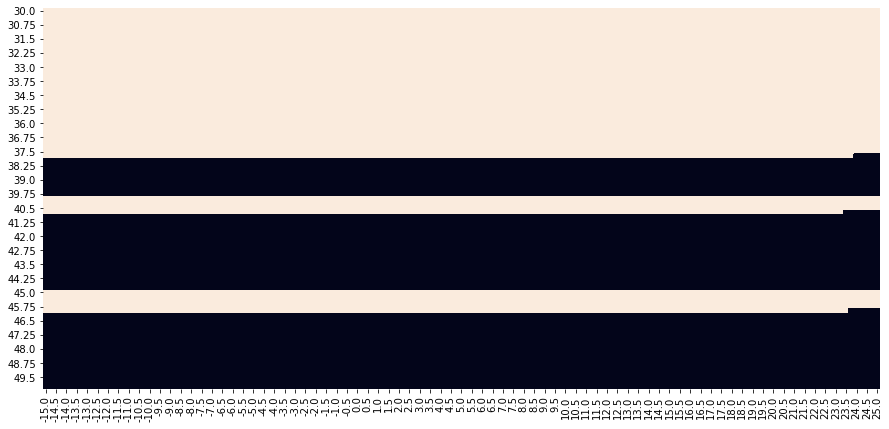

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.heatmap(pd.DataFrame.from_dict(status_container), ax = ax, cbar = False)

# Get status on number of checks since last run of this notebook

In [71]:
timer = timeit.timeit()
num_files_lh = len(lh_files)
num_files_ex3 = len(ex3_files)
#timer_prev = timer_now

In [72]:
prev_status = {}
prev_status['timer'] = timer
prev_status['num_files_lh'] = num_files_lh
prev_status['num_files_ex3'] = num_files_ex3
prev_status['time'] = datetime.datetime.now()

In [73]:
datetime.datetime.now()

datetime.datetime(2020, 7, 22, 21, 6, 6, 760765)

## Status since last run